# CNN en Dataset Mninst

La base de datos MNIST es una gran base de datos de dígitos escritos a mano que se usa comunmente para entrenar varios sistemas de procesamiento de imágenes. La base de datos también se usa ampliamente para capacitación y pruebas en el campo del aprendizaje automático.

![title](img/MnistExamples.png)

### Cargamos librerías

In [1]:
#pip install tensorflow

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import os

2025-01-13 08:55:17.659208: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preparamos los datos

In [2]:
# Total de clases a predecir.
num_classes = 10

# Tamaño de las imágenes.  Todas las imágenes deben tener las mismas dimensiones.
input_shape = (28, 28, 1)

In [3]:
df = keras.datasets.mnist.load_data()

In [6]:
# Lo que cargamos son básicamente matrices de 28x28, con rangos de variación entre 0-255 que corresponden a la intensidad del gris.
# O es el blanco puro, 255 es el negro puro.
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
df[0][0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

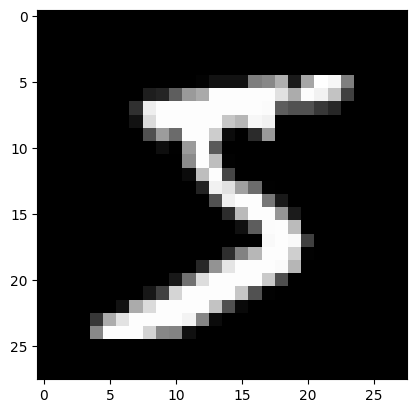

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
import matplotlib.pyplot as plt

plt.imshow(df[0][0][0], cmap='gray')
plt.show()
print(df[0][0][0])

In [10]:
# Para este caso particular, y por cómo están los datos en datasets, podemos usar este método de particionado.
(x_train, y_train), (x_test, y_test) = df

### Escalamos los datos

In [11]:
# Escalamos los datos en el rango [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

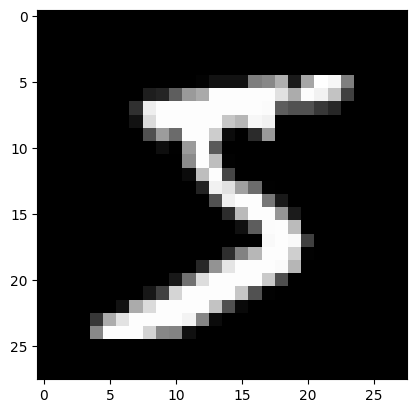

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.show()
print(x_train[0])

### Comprobamos que todas las imágenes tengan las mismas dimensiones

In [15]:
x_train.shape

(60000, 28, 28)

In [22]:
print(type(x_train[0]),x_train[0])
print(type(x_train[0][0]),x_train[0][0])
print(type(x_train[0][0][0]),x_train[0][0][0])

<class 'numpy.ndarray'> [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

In [23]:
x_test.shape

(10000, 28, 28)

In [24]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
print(type(x_train[0][0][0][0]),x_train[0][0][0][0])

<class 'numpy.float32'> 0.0


In [26]:
# Variable clase a predecir
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
print(type(y_train[0]), y_train[0])

<class 'numpy.uint8'> 5


In [35]:
y_train.shape

(60000,)

In [36]:
y_test.shape

(10000,)

### Convertir la variable a predecir en una matriz binaria de clases

In [37]:
# La transformación es similar a One Hot Encoding, pero con arrays
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [44]:
len(y_train[0])

10

### Construimos el modelo

In [18]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [26]:
num_filtros = 32
kernel_size = 3
pool_size = 2

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                            # Capa de entrada
        layers.Conv2D(num_filtros, kernel_size=kernel_size, activation="relu"),  # Total de kernels, tamaño de los mismos y función de activación a aplicar
        layers.MaxPooling2D(pool_size=pool_size),                     # Tamaño del muestreo a aplicar (devolverá número filas input / 2, número columnas input / 2)
        layers.Conv2D(num_filtros*2, kernel_size=kernel_size, activation="relu"),  # Segunda capa convolucional, puede tener el mismo tamaño
        layers.MaxPooling2D(pool_size=pool_size),                     # 2 segundo submuestreo
        layers.Flatten(),                                          # Aplanamiento de la salida convolucional
        layers.Dropout(0.5),                                       # Aplicamos dropout para mitigar el overfiting en nuestra CNN
                                                                   # Desactivamos de manera aleatoria un % de neuronas que no se tomarán en cuenta en el 
                                                                   # forwardpropagation, ni en el backwardpropagation
        #layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


* La razón de utilizar un Dropout, es que generalmente las neuronas cercanas suelen aprender patrones relacionados y estas relaciones pueden llegar a formar un patrón muy específico con los datos.
* Al hacer el dropout, el total de neuronas de la red se reduce, por lo que las neuronas están "obligadas" a trabajar de forma "solitaria", sin depender de las demás.
* Valores en el Dropout cercanos a 0, implica no desactivación de neuronas, cercanos a 1 implica la desactivación de casi todas las neuronas.
* El Dropout, puede aplicarse por capa.  Aquí lo hemos aplicado al final de la red.
* El Dropout NO SE APLICA en la capa de salida, ya que allí necesitamos todas la neuronas activas.
* Sólo hemos usado una capa 'Dense', pero es habitual en CNN añadir más capas con más neuronas y funciones de activación ReLU


In [27]:
# Vemos qué tenemos
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

### Entrenamiento del modelo

Keras incluye el argumento validation_split que nos permite utilizar una fracción de los datos de entrenamiento como datos de validación.  Esa fracción de datos no se usa para el entrenamiento y se reserva para evaluar la pérdida y cualquier otra métrica al final de cada ciclo.


In [28]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy",  # tenemos más de 2 clases, si fuera una clasificación binaria usaríamos binary_crossentropy
              optimizer="adam", 
              metrics=["accuracy"])

model.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 15ms/step - loss: 0.4126 - accuracy: 0.8860 - val_loss: 0.1503 - val_accuracy: 0.9587
Epoch 2/15
422/422 [==============================] - 7s 17ms/step - loss: 0.1753 - accuracy: 0.9481 - val_loss: 0.1038 - val_accuracy: 0.9737
Epoch 3/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1348 - accuracy: 0.9605 - val_loss: 0.0822 - val_accuracy: 0.9787
Epoch 4/15
422/422 [==============================] - 8s 18ms/step - loss: 0.1170 - accuracy: 0.9646 - val_loss: 0.0724 - val_accuracy: 0.9813
Epoch 5/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1073 - accuracy: 0.9677 - val_loss: 0.0696 - val_accuracy: 0.9825
Epoch 6/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0999 - accuracy: 0.9694 - val_loss: 0.0666 - val_accuracy: 0.9833
Epoch 7/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0906 - accuracy: 0.9722 - val_loss: 0.0623 - val_accuracy: 0.9837

### Evaluamos el modelo

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Pérdida datos Test:", score[0])
print("Precisión datos Test:", score[1])

Pérdida datos Test: 0.04950791224837303
Precisión datos Test: 0.9843000173568726
